In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv('train_2.csv')
train_helper = pd.read_csv('train_helper_2.csv')

In [3]:
train.head()

,Unnamed: 0,V1,V4,V7,Target,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,0,1872,485.69445,0,0,3,20,22,51,30,False,22_0,High,High_False
1,1,5533,393.45200,0,0,4,28,7,17,12,False,7_0,High,High_False
2,2,5278,375.75000,5,0,8,15,4,11,43,True,4_1,High,High_True
3,3,24,6.97225,2,0,6,26,1,11,42,False,1_0,Low,Low_False
4,4,449,16.70000,2,0,9,15,10,11,6,False,10_0,Mid-Low,Mid-Low_False


In [4]:
train_helper.head()

,Unnamed: 0,V1,V14,V15,V18,V19,V20,V16_year,V16_month,V16_day,V16_hour,V16_min,V16_sec,is_weekend_V16,V17_IP_A,V17_IP_B,V17_IP_C,V17_IP_D
0,0,1626,170291,0,875,1525792,77.550000,2017,11,18,5,26,58,True,117,167,140,162
1,1,2932,170291,0,875,471293,-25.850000,2017,11,18,5,26,59,True,133,193,46,52
2,2,7230,1827073,1,875,825535,76.761827,2017,11,18,5,27,2,True,127,75,140,137
3,3,1588,170291,0,875,2136427,-23.500000,2017,11,18,5,27,30,True,120,210,191,123
4,4,3625,2356022,1,875,825535,169.200000,2017,11,18,5,27,55,True,127,75,145,110


In [5]:
train.shape

(233633, 14)

In [6]:
train_helper.shape

(1231200, 18)

In [7]:
unique_v1_values = train['V1'].unique().tolist()

In [8]:
# Filter train_helper to only include rows where 'V1' is in the unique values list
train_helper = train_helper[train_helper['V1'].isin(unique_v1_values)]

In [9]:
train_helper.shape

(1230572, 18)

In [10]:
# Drop 'Unnamed: 0' column from train and train_helper
train.drop(columns=['Unnamed: 0'], inplace=True)
train_helper.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
train.head()

,V1,V4,V7,Target,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,1872,485.69445,0,0,3,20,22,51,30,False,22_0,High,High_False
1,5533,393.45200,0,0,4,28,7,17,12,False,7_0,High,High_False
2,5278,375.75000,5,0,8,15,4,11,43,True,4_1,High,High_True
3,24,6.97225,2,0,6,26,1,11,42,False,1_0,Low,Low_False
4,449,16.70000,2,0,9,15,10,11,6,False,10_0,Mid-Low,Mid-Low_False


In [12]:
train_helper.head()

,V1,V14,V15,V18,V19,V20,V16_year,V16_month,V16_day,V16_hour,V16_min,V16_sec,is_weekend_V16,V17_IP_A,V17_IP_B,V17_IP_C,V17_IP_D
0,1626,170291,0,875,1525792,77.550000,2017,11,18,5,26,58,True,117,167,140,162
1,2932,170291,0,875,471293,-25.850000,2017,11,18,5,26,59,True,133,193,46,52
2,7230,1827073,1,875,825535,76.761827,2017,11,18,5,27,2,True,127,75,140,137
3,1588,170291,0,875,2136427,-23.500000,2017,11,18,5,27,30,True,120,210,191,123
4,3625,2356022,1,875,825535,169.200000,2017,11,18,5,27,55,True,127,75,145,110


In [13]:
# Check for duplicates in train_helper
duplicate_v1 = train_helper[train_helper.duplicated(subset='V1', keep=False)]

# Print duplicates if you want to inspect them
print("Duplicate V1s in train_helper:")
print(duplicate_v1)

# Remove duplicates - keep only the first occurrence of each V1
train_helper_unique = train_helper.drop_duplicates(subset='V1', keep='first')

# Merge with train
merged_train = pd.merge(train_helper_unique, train, on='V1', how='left')

# Preview the merged data
merged_train.head()

Duplicate V1s in train_helper:
           V1      V14  V15  V18      V19         V20  V16_year  V16_month  \
0        1626   170291    0  875  1525792   77.550000      2017         11   
1        2932   170291    0  875   471293  -25.850000      2017         11   
2        7230  1827073    1  875   825535   76.761827      2017         11   
3        1588   170291    0  875  2136427  -23.500000      2017         11   
4        3625  2356022    1  875   825535  169.200000      2017         11   
...       ...      ...  ...  ...      ...         ...       ...        ...   
1231195  2262   170291    0  875     3679  -25.850000      2018          6   
1231196  2262  1827073    1  875     3679   76.761827      2018          6   
1231197  1121   170291    0  875  1777813   54.050000      2018          6   
1231198  2262   170291    0  875     3679  -25.850000      2018          6   
1231199  2262  1827073    1  875     3679   76.761827      2018          6   

         V16_day  V16_hour  V16_

,V1,V14,V15,V18,V19,V20,V16_year,V16_month,V16_day,V16_hour,...,Target,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,1626,170291,0,875,1525792,77.55,2017,11,18,5,...,0,7,9,7,25,43,False,7_0,Mid-Low,Mid-Low_False
1,1626,170291,0,875,1525792,77.55,2017,11,18,5,...,0,4,23,3,10,4,False,3_0,Mid-Low,Mid-Low_False
2,1626,170291,0,875,1525792,77.55,2017,11,18,5,...,0,3,30,5,29,17,False,5_0,High,High_False
3,1626,170291,0,875,1525792,77.55,2017,11,18,5,...,0,9,9,0,58,37,False,0_0,Mid-Low,Mid-Low_False
4,1626,170291,0,875,1525792,77.55,2017,11,18,5,...,0,7,17,9,31,28,False,9_0,Mid-Low,Mid-Low_False


In [14]:
merged_train.isnull().sum()

V1                0
V14               0
V15               0
V18               0
V19               0
V20               0
V16_year          0
V16_month         0
V16_day           0
V16_hour          0
V16_min           0
V16_sec           0
is_weekend_V16    0
V17_IP_A          0
V17_IP_B          0
V17_IP_C          0
V17_IP_D          0
V4                0
V7                0
Target            0
V5_month          0
V5_day            0
V5_hour           0
V5_min            0
V5_sec            0
is_weekend        0
hour_weekend      0
amount_bin        0
amount_weekend    0
dtype: int64

In [15]:
merged_train

,V1,V14,V15,V18,V19,V20,V16_year,V16_month,V16_day,V16_hour,...,Target,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,1626,170291,0,875,1525792,77.550000,2017,11,18,5,...,0,7,9,7,25,43,False,7_0,Mid-Low,Mid-Low_False
1,1626,170291,0,875,1525792,77.550000,2017,11,18,5,...,0,4,23,3,10,4,False,3_0,Mid-Low,Mid-Low_False
2,1626,170291,0,875,1525792,77.550000,2017,11,18,5,...,0,3,30,5,29,17,False,5_0,High,High_False
3,1626,170291,0,875,1525792,77.550000,2017,11,18,5,...,0,9,9,0,58,37,False,0_0,Mid-Low,Mid-Low_False
4,1626,170291,0,875,1525792,77.550000,2017,11,18,5,...,0,7,17,9,31,28,False,9_0,Mid-Low,Mid-Low_False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233464,716,95379,9,875,33514,76.761827,2018,5,20,7,...,0,9,6,6,6,51,True,6_1,High,High_True
233465,716,95379,9,875,33514,76.761827,2018,5,20,7,...,0,8,25,6,11,26,False,6_0,High,High_False
233466,1944,167243,2,875,1454582,76.761827,2018,6,1,22,...,0,9,11,4,36,35,False,4_0,High,High_False
233467,1944,167243,2,875,1454582,76.761827,2018,6,1,22,...,0,9,4,2,45,54,False,2_0,High,High_False


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
)
from sklearn.preprocessing import LabelEncoder

In [17]:
# Columns to encode
categorical_cols = ['hour_weekend', 'amount_weekend', 'amount_bin']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Replace with your actual target column name
target_col = 'Target'  

# Dropping non-numeric columns for Chi-Square and ANOVA tests
X = merged_train.select_dtypes(include=[np.number]).drop(columns=[target_col])
y = merged_train[target_col]

# Scaling features to [0,1] for chi2 (required)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chi-Square Test
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_scaled, y)
chi_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_selector.scores_})

# ANOVA F-value
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_scaled, y)
anova_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA F-Score': anova_selector.scores_})

# Mutual Information
mi_scores = mutual_info_classif(X_scaled, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mi_scores})

# Combine all scores
all_scores = chi_scores.merge(anova_scores, on='Feature').merge(mi_scores_df, on='Feature')
all_scores = all_scores.sort_values(by='Mutual Info', ascending=False)

# Display the top features
all_scores.head(10)


,Feature,Chi2 Score,ANOVA F-Score,Mutual Info
3,V18,0.004279,0.372849,0.059737
1,V14,4.337522,30.548200,0.032716
7,V16_month,0.642108,32.695330,0.025536
0,V1,0.405543,2.369698,0.022680
8,V16_day,0.052067,5.117973,0.014765
18,V5_month,1.001473,5.909114,0.008626
5,V20,20.698691,454.065385,0.007598
4,V19,1.781216,9.297205,0.007322
13,V17_IP_B,3.826857,39.279270,0.006894
14,V17_IP_C,0.262705,4.079803,0.006788


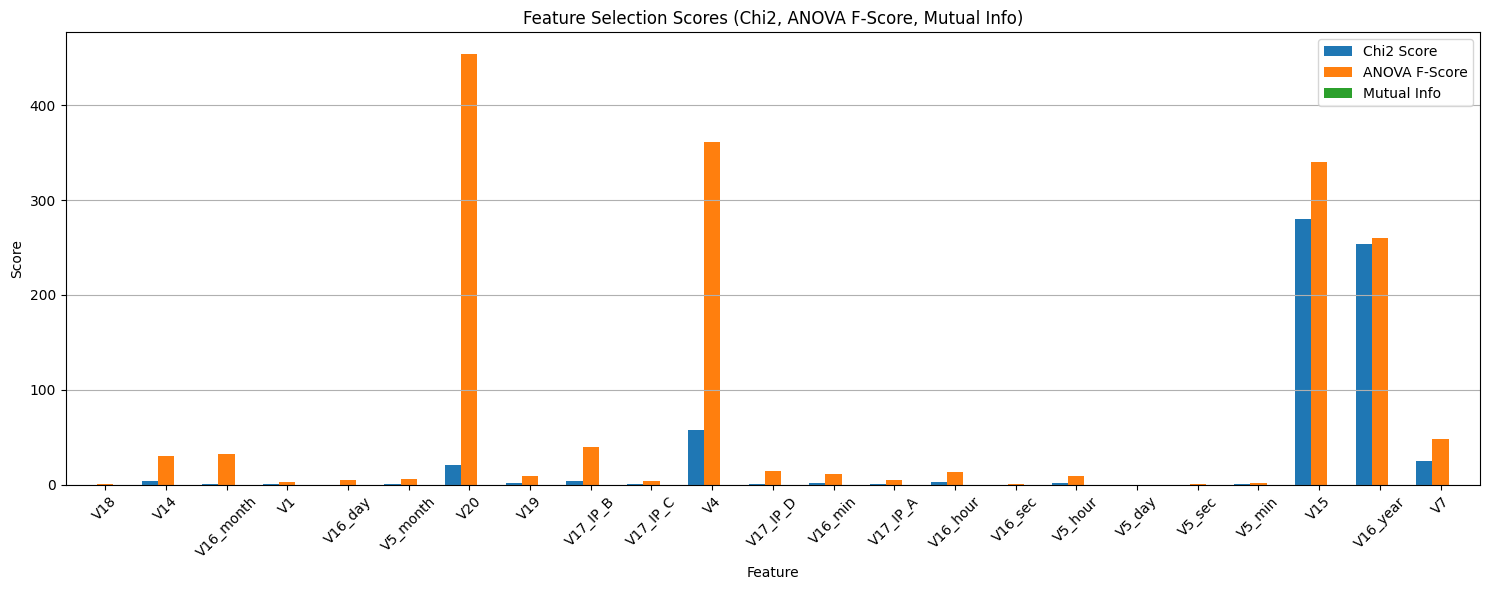

In [19]:
# Set feature as index for plotting
plot_df = all_scores.set_index("Feature")

# Plot
plot_df.plot(kind='bar', figsize=(15, 6), width=0.8)
plt.title("Feature Selection Scores (Chi2, ANOVA F-Score, Mutual Info)")
plt.ylabel("Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
from sklearn.ensemble import VotingClassifier

# ✅ Features and target
X = merged_train.drop('Target', axis=1)
y = merged_train['Target']

# ✅ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ✅ Individual models
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'
)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# ✅ Models to evaluate (with ensemble added)
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Logistic Regression': lr,
}

# ✅ Train and Evaluate
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"✅ F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")
    print(f"✅ F1 Score (weighted): {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"✅ F1 Score (class 1): {f1_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Precision (class 1): {precision_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Recall (class 1): {recall_score(y_test, preds, pos_label=1):.4f}")
    
    if probs is not None and len(np.unique(y)) == 2:
        print(f"✅ ROC AUC: {roc_auc_score(y_test, probs):.4f}")
        
    print("📊 Classification Report:")
    print(classification_report(y_test, preds))



🔍 Training Random Forest...
✅ Accuracy: 0.9952
✅ F1 Score (macro): 0.8275
✅ F1 Score (weighted): 0.9957
✅ F1 Score (class 1): 0.6575
✅ Precision (class 1): 0.5429
✅ Recall (class 1): 0.8333
✅ ROC AUC: 0.9753
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46436
           1       0.54      0.83      0.66       258

    accuracy                           1.00     46694
   macro avg       0.77      0.91      0.83     46694
weighted avg       1.00      1.00      1.00     46694


🔍 Training XGBoost...


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:02:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9838
✅ F1 Score (macro): 0.6835
✅ F1 Score (weighted): 0.9884
✅ F1 Score (class 1): 0.3752
✅ Precision (class 1): 0.2384
✅ Recall (class 1): 0.8798
✅ ROC AUC: 0.9650
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     46436
           1       0.24      0.88      0.38       258

    accuracy                           0.98     46694
   macro avg       0.62      0.93      0.68     46694
weighted avg       1.00      0.98      0.99     46694


🔍 Training Logistic Regression...


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 0.7027
✅ F1 Score (macro): 0.4234
✅ F1 Score (weighted): 0.8203
✅ F1 Score (class 1): 0.0221
✅ Precision (class 1): 0.0113
✅ Recall (class 1): 0.6085
✅ ROC AUC: 0.7199
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     46436
           1       0.01      0.61      0.02       258

    accuracy                           0.70     46694
   macro avg       0.50      0.66      0.42     46694
weighted avg       0.99      0.70      0.82     46694


🔍 Training Voting Ensemble...


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:04:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 0.9904
✅ F1 Score (macro): 0.7481
✅ F1 Score (weighted): 0.9924
✅ F1 Score (class 1): 0.5011
✅ Precision (class 1): 0.3516
✅ Recall (class 1): 0.8721
✅ ROC AUC: 0.9684
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     46436
           1       0.35      0.87      0.50       258

    accuracy                           0.99     46694
   macro avg       0.68      0.93      0.75     46694
weighted avg       1.00      0.99      0.99     46694



In [33]:
# ✅ Features and target
X = merged_train.drop('Target', axis=1)
y = merged_train['Target']

# ✅ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ✅ Models to evaluate
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=1000,
        max_depth=20,
        min_samples_leaf=4,
        random_state=42,
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
}

# ✅ Train and Evaluate
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"✅ F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")
    print(f"✅ F1 Score (weighted): {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"✅ F1 Score (class 1): {f1_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Precision (class 1): {precision_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Recall (class 1): {recall_score(y_test, preds, pos_label=1):.4f}")
    
    if probs is not None and len(np.unique(y)) == 2:
        print(f"✅ ROC AUC: {roc_auc_score(y_test, probs):.4f}")
        
    print("📊 Classification Report:")
    print(classification_report(y_test, preds))


🔍 Training Random Forest...
✅ Accuracy: 0.9967
✅ F1 Score (macro): 0.8650
✅ F1 Score (weighted): 0.9969
✅ F1 Score (class 1): 0.7317
✅ Precision (class 1): 0.6646
✅ Recall (class 1): 0.8140
✅ ROC AUC: 0.9844
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46436
           1       0.66      0.81      0.73       258

    accuracy                           1.00     46694
   macro avg       0.83      0.91      0.87     46694
weighted avg       1.00      1.00      1.00     46694


🔍 Training XGBoost...


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:25:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9838
✅ F1 Score (macro): 0.6835
✅ F1 Score (weighted): 0.9884
✅ F1 Score (class 1): 0.3752
✅ Precision (class 1): 0.2384
✅ Recall (class 1): 0.8798
✅ ROC AUC: 0.9650
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     46436
           1       0.24      0.88      0.38       258

    accuracy                           0.98     46694
   macro avg       0.62      0.93      0.68     46694
weighted avg       1.00      0.98      0.99     46694


🔍 Training Logistic Regression...
✅ Accuracy: 0.7027
✅ F1 Score (macro): 0.4234
✅ F1 Score (weighted): 0.8203
✅ F1 Score (class 1): 0.0221
✅ Precision (class 1): 0.0113
✅ Recall (class 1): 0.6085
✅ ROC AUC: 0.7199
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     46436
           1       0.01      0.61      0.02       258

    accuracy                           0.70     46694
   macro a

C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

# ✅ Define model
xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# ✅ Custom F1 scorer for class 1
f1_class1 = make_scorer(f1_score, pos_label=1)

# ✅ Define parameter grid
param_grid = {
    'scale_pos_weight': [1, 5, 10, 15],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}

# ✅ Run grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f1_class1,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# ⚠️ Use only one of SMOTE or scale_pos_weight → so use original imbalanced data
grid_search.fit(X_train, y_train)

# ✅ Best model and parameters
print("Best parameters found:\n", grid_search.best_params_)
print(f"Best F1 Score for Class 1: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:48:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 5}
Best F1 Score for Class 1: 0.3186


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report
)
from xgboost import XGBClassifier

# ✅ Encode object-type columns using LabelEncoder
label_encoders = {}
for col in merged_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_train[col] = le.fit_transform(merged_train[col])
    label_encoders[col] = le  # optional: store encoder for inverse transform later

# ✅ Features and target
X = merged_train.drop('Target', axis=1)
y = merged_train['Target']

# ✅ Normalize features (optional)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Initialize XGBoost with tuned parameters
best_xgb = XGBClassifier(
    learning_rate=0.3,
    max_depth=6,
    n_estimators=200,
    scale_pos_weight=15,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# ✅ Train the model
best_xgb.fit(X_train, y_train)

# ✅ Predict and evaluate
preds = best_xgb.predict(X_test)

print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"✅ F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")
print(f"✅ F1 Score (weighted): {f1_score(y_test, preds, average='weighted'):.4f}")
print(f"✅ F1 Score (class 1): {f1_score(y_test, preds, pos_label=1):.4f}")
print(f"✅ Precision (class 1): {precision_score(y_test, preds, pos_label=1):.4f}")
print(f"✅ Recall (class 1): {recall_score(y_test, preds, pos_label=1):.4f}")
print("📊 Classification Report:\n")
print(classification_report(y_test, preds))

C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:00:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9982
✅ F1 Score (macro): 0.9179
✅ F1 Score (weighted): 0.9982
✅ F1 Score (class 1): 0.8367
✅ Precision (class 1): 0.8607
✅ Recall (class 1): 0.8140
📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46436
           1       0.86      0.81      0.84       258

    accuracy                           1.00     46694
   macro avg       0.93      0.91      0.92     46694
weighted avg       1.00      1.00      1.00     46694

